In [55]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
import tensorflow as tf
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

#train: X=(50000, 32, 32, 3), y=(50000, 1)
#test: X=(10000, 32, 32, 3), y=(10000, 1)

In [56]:
def get_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    trainY = np_utils.to_categorical(trainY)    #One-hot-encode by np_utils.to_categorical to binary class matrix
    testY = np_utils.to_categorical(testY)      #One-hot-encode by np_utils.to_categorical to binary class matrix
    return trainX, trainY, testX, testY

In [57]:

def normalization(train, test):
    normalization_train = train.astype('float32')       
    normalization_test = test.astype('float32')
    normalization_train = normalization_train / 255.0   #0-1
    normalization_test = normalization_test / 255.0     #0-1
    return normalization_train, normalization_test

In [58]:

def model_definition():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='sigmoid'))
    
    optimize = SGD(learning_rate=0.001, momentum=0.9) #learning rate default: 0.1, tested with 0.01 and 0.1
    model.compile(optimizer=optimize, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [59]:
def plot_acc_and_cel(history):

    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss ')
    pyplot.plot(history.history['loss'], color='red', label='train')
    pyplot.plot(history.history['val_loss'], color='blue', label='test') ## (history.history) access training history

    pyplot.subplot(2, 1, 2)
    pyplot.title('Accuracy of class predictions')
    pyplot.plot(history.history['accuracy'], color='red', label='train') # (history.history)access training history
    pyplot.plot(history.history['val_accuracy'], color='blue', label='test')

Epoch 1/100
781/781 - 33s - loss: 1.7596 - accuracy: 0.3601 - val_loss: 1.5066 - val_accuracy: 0.4498
Epoch 2/100
781/781 - 32s - loss: 1.4807 - accuracy: 0.4643 - val_loss: 1.3612 - val_accuracy: 0.5004
Epoch 3/100
781/781 - 33s - loss: 1.3428 - accuracy: 0.5183 - val_loss: 1.2325 - val_accuracy: 0.5654
Epoch 4/100
781/781 - 32s - loss: 1.2446 - accuracy: 0.5563 - val_loss: 1.1327 - val_accuracy: 0.5982
Epoch 5/100
781/781 - 32s - loss: 1.1570 - accuracy: 0.5903 - val_loss: 1.0466 - val_accuracy: 0.6311
Epoch 6/100
781/781 - 32s - loss: 1.0918 - accuracy: 0.6152 - val_loss: 1.0174 - val_accuracy: 0.6447
Epoch 7/100
781/781 - 32s - loss: 1.0250 - accuracy: 0.6405 - val_loss: 0.9633 - val_accuracy: 0.6597
Epoch 8/100
781/781 - 32s - loss: 0.9761 - accuracy: 0.6560 - val_loss: 0.8879 - val_accuracy: 0.6875
Epoch 9/100
781/781 - 32s - loss: 0.9324 - accuracy: 0.6745 - val_loss: 0.9064 - val_accuracy: 0.6885
Epoch 10/100
781/781 - 32s - loss: 0.8926 - accuracy: 0.6858 - val_loss: 0.8961 - 

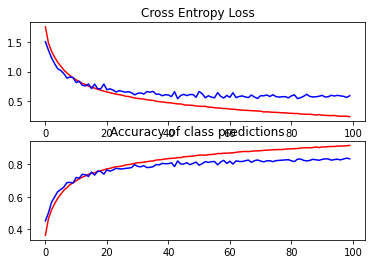

In [60]:
def run_model():
    trainX, trainY, testX, testY = get_dataset()
    trainX, testX = normalization(trainX, testX)
    model = model_definition()

    datagenerator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True) #data augmentation (data generaation)
    iterator_train = datagenerator.flow(trainX, trainY, batch_size=64) #tested with 32

    fit = int(trainX.shape[0] / 64)
    history = model.fit(iterator_train, steps_per_epoch=fit, epochs=100, validation_data=(testX, testY), verbose=2) # only very minor accuracy changes after 75-80 epochs -> around 83%

    _, accuracy = model.evaluate(testX, testY, verbose=0)  #ign
    print('Accuracy in percentage %.3f' % (accuracy * 100.0))
    
    plot_acc_and_cel(history)

run_model()
# results from previous task 1-NN acc = 26%, Bayes acc = 42 %
# This time accuracy settles in around 83-84 % range after 100 epochs